# 단변량분석_숫자형변수

<img src='https://github.com/DA4BAM/image/blob/main/%EB%8B%A8%EB%B3%80%EB%9F%89%EB%B6%84%EC%84%9D.png?raw=true' width=400/>

# 1.환경준비

## (1) 라이브러리 불러오기

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## (2) 데이터 로딩

### 1) titanic
* url :  'https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv'

**[titanic_simple 데이터 셋 정보]**

- PassengerId : 승객번호
- Survived : 생존여부(1:생존, 0:사망)
- Pclass : 객실등급(1:1등급, 2:2등급, 3:3등급)
- Name : 승객이름
- Sex : 성별(male, female)
- Age : 나이
- Fare : 운임($)
- Embarked : 승선지역(Southhampton, Cherbourg, Queenstown)

In [3]:
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southhampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southhampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southhampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southhampton


### 2) New York Air Quality

* url : https://bit.ly/3qmthqZ

**[airquality 데이터 셋 정보]**

- Ozone: 오존 농도  
- Solar.R: 태양복사량
- Wind: 풍속
- Temp: 기온
- Month: 월
- Day: 일

In [4]:
air = pd.read_csv('https://bit.ly/3qmthqZ')
air.head()

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,NaN,14.3,56,1973-05-05


# 2.수치화

## (1) 대푯값

### 1) 평균

* 산술평균

In [4]:
a = [1, 2, 3, 3, 4, 4, 4, 5, 6, 7, 8, 9, 10, 11, 15, 17, 17, 19, 20, 25, 30]
print(np.mean(a))

10.476190476190476


In [5]:
titanic.Fare.mean()

32.204207968574636

* 조화평균 -> f1 score에 사용됨
    * a, b : [[두 수(a,b)의 역수]의 평균]의 역수
    * `분자가 같고, 분모가 다른 두 숫자`에 대한 평균 계산시 사용 (추후 모델 평가시 중요하게 사용됩니다. 여기서는 가볍게~~)
    * 1) 두 수의 역수의 평균 :
$\frac{(\frac{1}{a}+\frac{1}{b})}{2}$
    * 2) 1)의 역수 :
$\frac{2*a*b}{(a+b)}$

In [6]:
# 거리 20 km
# 갈 때 속력 60 km, 올 때 속력 80 km
# 평균 속력은?

a1, a2 = 60, 80
hm = 2*a1*a2 / (a1 + a2)
print(hm)

68.57142857142857


### 2) 중앙값(중위수, median)  

자료의 순서상 가운데 위치한 값

In [7]:
a = [1, 2, 3, 3, 4, 4, 4, 5, 6, 7, 8, 9, 10, 11, 15, 17, 17, 19, 20, 25, 30]
print(np.median(a))

8.0


In [8]:
titanic.Fare.median()

14.4542

### 3) 최빈값

* 자료 중에서 가장 빈번하게 나타나는 값(빈도가 높은 값)
* 이산형 정보

In [12]:
a = [1, 2, 3, 3, 4, 4, 4, 5, 6, 7, 8, 9, 10, 11, 15, 17, 17, 19, 20, 25, 30]
a = pd.Series(a)
a.mode() # Series 형태로 반환

0    4
dtype: int64

### 4) 4분위수

![](https://mblogthumb-phinf.pstatic.net/20150702_229/jevida_1435803723327eyeeG_PNG/3.png?type=w2)

In [13]:
a = [1, 2, 3, 3, 4, 4, 4, 5, 6, 7, 8, 9, 10, 11, 15, 17, 17, 19, 20, 25, 30]
print(np.percentile(a, [0, 25, 50, 75, 100]))

[ 1.  4.  8. 17. 30.]


<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

연습문제를 풀어 봅시다.

In [18]:
# titanic의 Age에 대해서 다음을 각각 확인해 봅시다.

# 평균
print(titanic['Age'].mean())

# 최빈값
print(titanic['Age'].mode()[0])

# 중앙값
print(titanic['Age'].median())

# 4분위수 -> 전체 행에 대해 계산할 경우 Age 열에 결측치가 있어 nan으로 결과가 나옴
age = titanic.loc[titanic['Age'].notnull(), 'Age']
print(np.percentile(age, [0, 25, 50, 75, 100]))


29.69911764705882
24.0
28.0
[ 0.42  20.125 28.    38.    80.   ]


In [20]:
# air의 Ozone에 대해서 다음을 각각 확인해 봅시다.

# 평균
print(air['Ozone'].mean())

# 최빈값
print(air['Ozone'].mode()[0])

# 중앙값
print(air['Ozone'].median())

# 4분위수
print(np.percentile(air['Ozone'], [0, 25, 50, 75, 100]))


42.052287581699346
23
34.0
[  1.  20.  34.  59. 168.]


## (2) 기초통계량

### 1) 시리즈.describe()

In [21]:
titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

### 2) 데이터프레임.describe()

In [22]:
# 데이터프레임 각 변수들의 기초통계량을 조회해 봅시다.
titanic.describe() # 숫자 형식 데이터의 기초통계량

,PassengerId,Survived,Pclass,Age,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,32.204208
std,257.353842,0.486592,0.836071,14.526497,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200


In [23]:
titanic.describe(include='all') # 문자 형식 데이터도 포함 (unique, top, freq 추가)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,Southhampton
freq,NaN,NaN,NaN,1,577,NaN,NaN,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,31.000000,NaN


<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

air 데이터프레임에 대해서 기초 통계량을 구하고, 내용을 파악해 봅시다.

In [26]:
air.describe()

,Ozone,Solar.R,Wind,Temp
count,153.000000,146.000000,153.000000,153.000000
mean,42.052288,185.931507,9.957516,77.882353
std,30.156127,90.058422,3.523001,9.465270
min,1.000000,7.000000,1.700000,56.000000
25%,20.000000,115.750000,7.400000,72.000000
50%,34.000000,205.000000,9.700000,79.000000
75%,59.000000,258.750000,11.500000,85.000000
max,168.000000,334.000000,20.700000,97.000000


# 3.시각화

## (1) 히스토그램

1) 히스토그램 기본

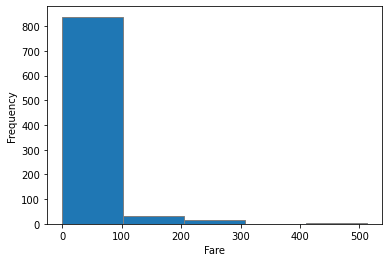

In [27]:
# plt.hist(1차원 데이터, bins=구간의 개수, edgecolor=경계선 색상)
plt.hist(titanic.Fare, bins = 5, edgecolor = 'gray') 
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

2) 구간의 갯수를 조정해 봅시다.

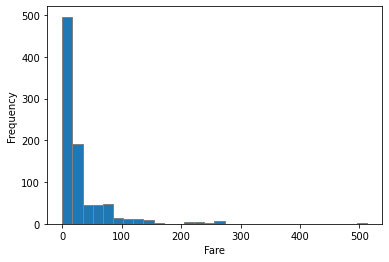

In [32]:
plt.hist(titanic.Fare, bins = 30, edgecolor = 'grey')
# 최적의 구간 개수가 있는 것 X : 구간의 개수를 조절하며 데이터 전체의 흐름을 알 수 있음
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

3) 구간 값과 갯수를 확인해 봅시다.

* 결과를 저장하면, 구간과 빈도수를 확인할 수 있습니다.
    * 히스토그램을 저장하면 튜플.
    * 튜플 안에는 넘파이 어레이가 2개로 구성됨.
    * 첫번째 넘파이 어레이는 빈도수,
    * 두번째는 구간 값.


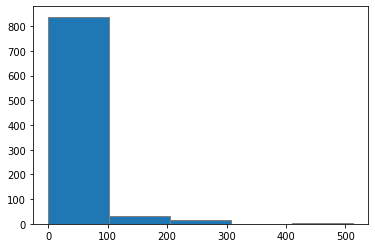

(array([838.,  33.,  17.,   0.,   3.]), array([  0.     , 102.46584, 204.93168, 307.39752, 409.86336, 512.3292 ]), <BarContainer object of 5 artists>)
<class 'tuple'>
--------------------------------------------------
빈도수 :  [838.  33.  17.   0.   3.]
구간값 :  [  0.      102.46584 204.93168 307.39752 409.86336 512.3292 ]


In [29]:
hist1 = plt.hist(titanic.Fare, bins = 5, edgecolor = 'gray')
plt.show()

print(hist1)
print(type(hist1))
print('-' * 50)
print('빈도수 : ', hist1[0])
print('구간값 : ', hist1[1])

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

[문제1] titanic의 Age에 칼럼에 대해 히스토그램을 그려 봅시다.
* bins = 8, 16, 32, 64

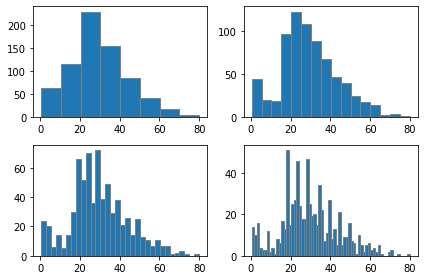

In [45]:
plt.subplot(2, 2, 1)
# plt.title('bin = 8')
plt.hist(titanic['Age'], 8, edgecolor='grey')

plt.subplot(2, 2, 2)
# plt.title('bin = 16')
plt.hist(titanic['Age'], 16, edgecolor='grey')

plt.subplot(2, 2, 3)
# plt.title('bin = 32')
plt.hist(titanic['Age'], 32, edgecolor='grey')

plt.subplot(2, 2, 4)
# plt.title('bin = 64')
plt.hist(titanic['Age'], 64, edgecolor='grey')

plt.tight_layout()
plt.show()

[문제2] Age에 칼럼에 대해 히스토그램을 그릴때, 빈도수와 구간값을 살펴 봅시다.
* bins = 8

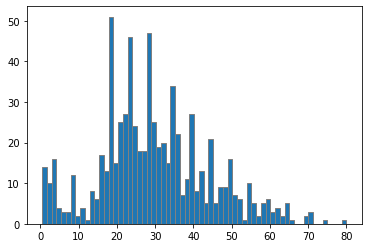

----------------------------------------
빈도수 :  [14. 10. 16.  4.  3.  3. 12.  2.  4.  1.  8.  6. 17. 13. 51. 15. 25. 27.
 46. 24. 18. 18. 47. 25. 19. 20. 15. 34. 22.  7. 11. 27.  8. 13.  5. 21.
  5.  9.  9. 16.  7.  6.  1. 10.  5.  2.  5.  6.  3.  4.  2.  5.  1.  0.
  0.  2.  3.  0.  0.  1.  0.  0.  0.  1.]
구간값 :  [ 0.42       1.6634375  2.906875   4.1503125  5.39375    6.6371875
  7.880625   9.1240625 10.3675    11.6109375 12.854375  14.0978125
 15.34125   16.5846875 17.828125  19.0715625 20.315     21.5584375
 22.801875  24.0453125 25.28875   26.5321875 27.775625  29.0190625
 30.2625    31.5059375 32.749375  33.9928125 35.23625   36.4796875
 37.723125  38.9665625 40.21      41.4534375 42.696875  43.9403125
 45.18375   46.4271875 47.670625  48.9140625 50.1575    51.4009375
 52.644375  53.8878125 55.13125   56.3746875 57.618125  58.8615625
 60.105     61.3484375 62.591875  63.8353125 65.07875   66.3221875
 67.565625  68.8090625 70.0525    71.2959375 72.539375  73.7828125
 75.02625   76

In [47]:
hist2 = plt.hist(titanic['Age'], 64, edgecolor='grey')
plt.show()

print('--------' * 5)
print('빈도수 : ', hist2[0])
print('구간값 : ', hist2[1])

## (2) 밀도함수 그래프

* 히스토그램의 단점 
    * 구간bin의 너비를 어떻게 잡는지에 따라 전혀 다른 모양이 될 수 있음

* 밀도함수 그래프
    * 막대의 너비를 가정하지 않고 모든 점에서 데이터의 밀도를 추정하는 커널 밀도 추정(Kernel Density Estimation)방식을 사용하여 이러한 단점을 해결.
    * 밀도함수 그래프 아래 면적은 1

1) 밀도함수 그래프 그리기

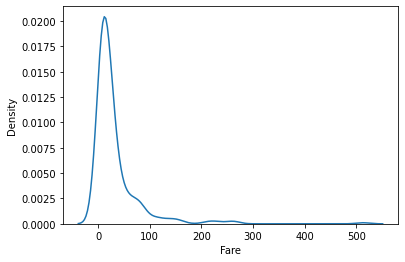

In [48]:
sns.kdeplot(titanic['Fare'])
plt.show()

* 밀도 추정
    * 측정된(관측된) 데이터로부터 전체 데이터 분포의 특성을 추정
    * 예를 들어… OO역 사거리 일일 교통량을 측정한다고 해 봅시다.
        * 어제는 1200대 차량이 통과했고, 오늘은 1420대, 내일은, 모레는…
        * 이렇게 3개월간 매일 측정했다고 할 때, 
        * 우리는 약 90일치의 데이터를 가지고 일일 교통량 분포를 히스토그램으로 그려볼 수 있습니다. 
        * 그리고 나서 특정한 날의 교통량이 얼마나 될지 확률로 나타냄.



<img src='https://github.com/DA4BAM/image/blob/main/%EB%B0%80%EB%8F%84%EC%B6%94%EC%A0%95.png?raw=true' width=800/>

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

titanic Age에 대해서 밀도함수 그래프를 그려봅시다.  

히스토그램과 어떤 차이가 있나요?

[]

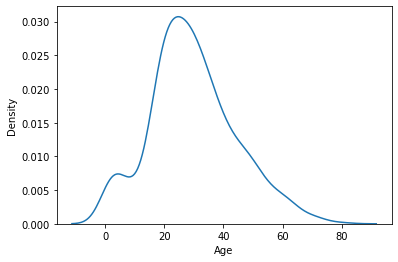

In [53]:
sns.kdeplot(titanic['Age'])
plt.plot()

[]

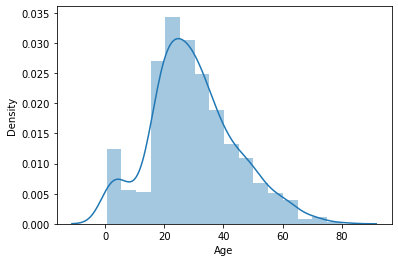

In [52]:
sns.distplot(titanic['Age'], hist = True, bins = 16)
plt.plot()

## (3) boxplot

**주의사항** : 값에 **nan**이 있으면 그래프가 그려지지 않습니다.

1) boxplot 기본

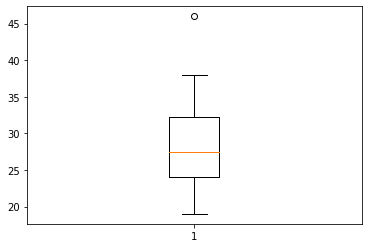

In [54]:
age = [19,20,23,46,21,25,26,25,28,31,37,24,28,34,38,33,32,29,27,24]
plt.boxplot(age)
plt.show()

2) 옆으로 그리기

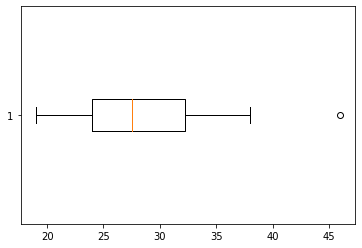

In [55]:
age = [19,20,23,46,21,25,26,25,28,31,37,24,28,34,38,33,32,29,27,24]
plt.boxplot(age, vert = False) # vert(vertical): 생략시 True(세로)
plt.show()

**박스플롯의 의미**

<img src='https://github.com/DA4BAM/image/blob/main/%EB%B0%95%EC%8A%A4%ED%94%8C%EB%A1%AF1.png?raw=true' width=600/>

<img src='https://github.com/DA4BAM/image/blob/main/%EB%B0%95%EC%8A%A4%ED%94%8C%EB%A1%AF2.png?raw=true' width=800/>


3) 박스플로의 값들 가져오기

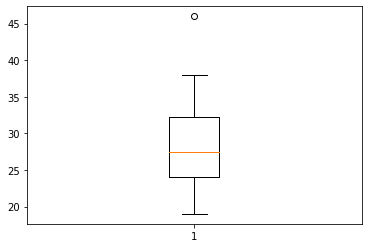

<class 'dict'>
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
--------------------------------------------------
[<matplotlib.lines.Line2D object at 0x0000017DC9014F10>, <matplotlib.lines.Line2D object at 0x0000017DC9034220>]
[24. 19.]
[32.25 38.  ]


In [5]:
age = [19,20,23,46,21,25,26,25,28,31,37,24,28,34,38,33,32,29,27,24]
box1 = plt.boxplot(age)
plt.show()

print(type(box1))
print(box1.keys())
print('-'* 50)
print(box1['whiskers'])
print(box1['whiskers'][0].get_ydata()) # 아래쪽 수염의 max, min
print(box1['whiskers'][1].get_ydata()) # 위쪽 수염의 min, max

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

titanic의 Age와 Fare에 대해서 각각 박스 플롯을 그리고 해석해 봅시다.

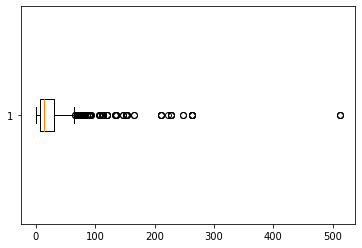

In [10]:
# Fare
plt.boxplot(titanic['Fare'], vert=False)
plt.show()

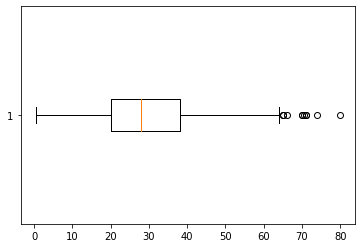

In [11]:
# Age
# nan이 있으면 박스플롯이 그려지지 않습니다. nan을 제외하고 그리시오.
age = titanic.loc[titanic['Age'].notnull(), 'Age']
plt.boxplot(age, vert=False)
plt.show()

- Age : boxplot의 수염(whiskers)의 길이를 손으로 계산해 봅시다.



## (4) 시계열 데이터 시각화

시계열 데이터는 보통 시간 축(x축)에 맞게 값들을 라인차트로 표현합니다.

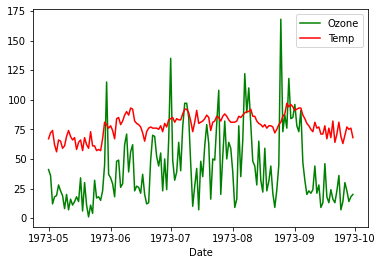

In [12]:
air['Date'] = pd.to_datetime(air['Date']) # 날짜 형식으로 변환

plt.plot('Date', 'Ozone', 'g-', data = air, label = 'Ozone')
plt.plot('Date', 'Temp', 'r-', data = air, label = 'Temp')

plt.xlabel('Date')
plt.legend()
plt.show()

# 4.종합실습

airquality 데이터의 다음 변수들에 대해 기초통계량과 시각화로 데이터를 분석하시오.

**[airquality 데이터 셋 정보]**

- Ozone: 오존 농도  
- Solar.R: 태양복사량
- Wind: 풍속
- Temp: 기온
- Month: 월
- Day: 일

① Ozone

기초통계량
count    153.000000
mean      42.052288
std       30.156127
min        1.000000
25%       20.000000
50%       34.000000
75%       59.000000
max      168.000000
Name: Ozone, dtype: float64
--------------------------------------------------


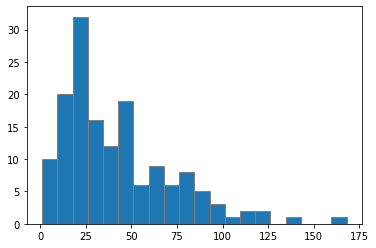

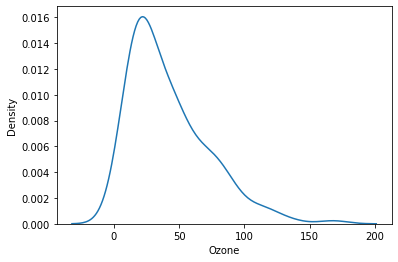

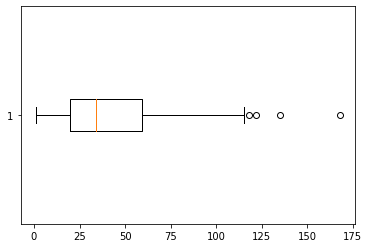

In [20]:
ozone = air.loc[air['Ozone'].notnull(), 'Ozone']

# 기초 통계량
print('기초통계량')
print(ozone.describe())
print('-' * 50)

# 히스토그램
plt.hist(ozone, bins=20, edgecolor='grey')
plt.show()

# density plot
sns.kdeplot(ozone)
plt.show()

# boxplot
plt.boxplot(ozone, vert=False)
plt.show()


② Temp

기초통계량
count    153.000000
mean      77.882353
std        9.465270
min       56.000000
25%       72.000000
50%       79.000000
75%       85.000000
max       97.000000
Name: Temp, dtype: float64
--------------------------------------------------


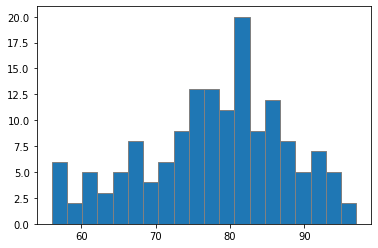

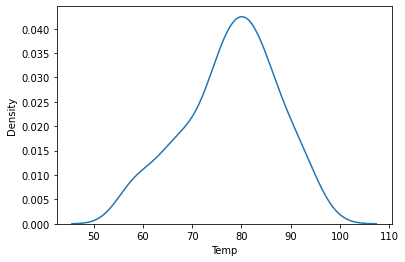

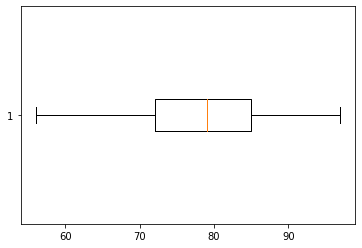

In [21]:
temp = air.loc[air['Temp'].notnull(), 'Temp']

# 기초 통계량
print('기초통계량')
print(temp.describe())
print('-' * 50)

# 히스토그램
plt.hist(temp, bins=20, edgecolor='grey')
plt.show()

# density plot
sns.kdeplot(temp)
plt.show()

# boxplot
plt.boxplot(temp, vert=False)
plt.show()


③ Wind

기초통계량
count    153.000000
mean       9.957516
std        3.523001
min        1.700000
25%        7.400000
50%        9.700000
75%       11.500000
max       20.700000
Name: Wind, dtype: float64
--------------------------------------------------


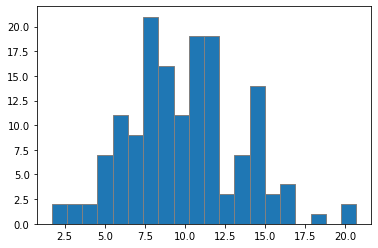

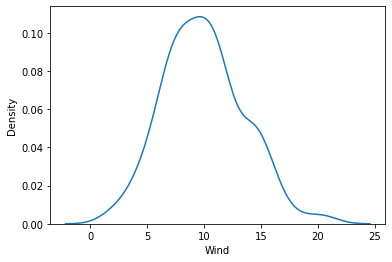

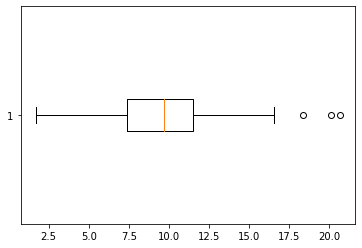

In [22]:
wind = air.loc[air['Wind'].notnull(), 'Wind']

# 기초 통계량
print('기초통계량')
print(wind.describe())
print('-' * 50)

# 히스토그램
plt.hist(wind, bins=20, edgecolor='grey')
plt.show()

# density plot
sns.kdeplot(wind)
plt.show()

# boxplot
plt.boxplot(wind, vert=False)
plt.show()
